# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

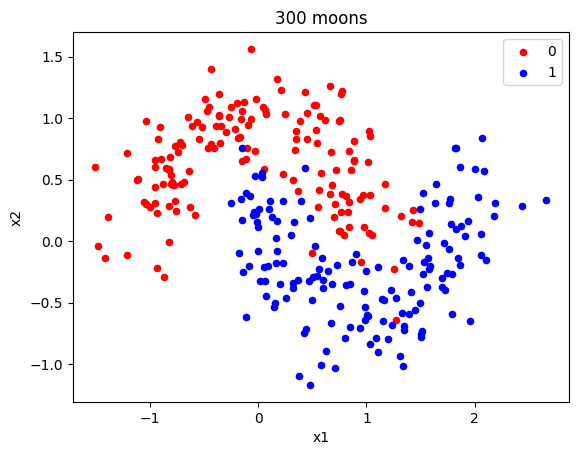

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

In [57]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
grouped = df.groupby('label')
df

,x1,x2,label
0,1.396261,-0.098822,1
1,-1.082181,-0.030658,0
2,-0.476777,0.704088,0
3,0.339396,-0.108429,1
4,0.528895,-0.078069,1
...,...,...,...
245,0.068203,0.944052,0
246,0.786712,-0.598959,1
247,-0.944172,0.276065,0
248,0.591501,1.136309,0


❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

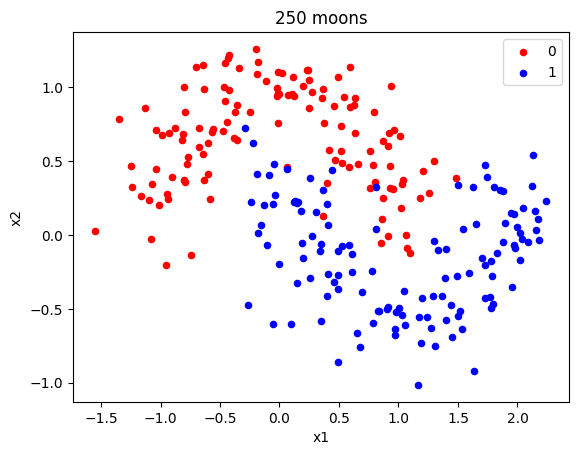

In [10]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
plot_moons(X, y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## (2) Designing a basic Neural Network  for a binary classification task

In [13]:
X_train.shape

(175, 2)

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

2023-05-30 21:44:53.614956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 21:44:53.786776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-30 21:44:53.786803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-30 21:44:53.816825: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-30 21:44:54.803071: W tensorflow/stream_executor/platform/de

In [15]:
def initialize_model():
    model = models.Sequential()
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model.add(layers.Dense(5, activation='relu', input_dim=2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

2023-05-30 21:54:04.247922: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-30 21:54:04.247991: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-30 21:54:04.248055: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-J3L4507): /proc/driver/nvidia/version does not exist
2023-05-30 21:54:04.248608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [18]:
15++5+1

21

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [19]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.6717 - accuracy: 0.5543
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.5600
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.5600
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.5657
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.5714
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.5829
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.5771
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.5714
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.5657
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.5714
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8229
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8229
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8229
Epoch 87/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8229
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.8229
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8229
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8229
Epoch 91/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8229
Epoch 92/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3798 - accuracy: 0.8229
Epoch 93/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8229
Epoch 94/100
6/6 [===============

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [20]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7fd8f7741e10>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.671710729598999,
   0.6665571928024292,
   0.6614460349082947,
   0.6563807725906372,
   0.6514253616333008,
   0.6463464498519897,
   0.6415228247642517,
   0.6367788314819336,
   0.6322572827339172,
   0.627614438533783,
   0.6229262948036194,
   0.618552029132843,
   0.6140621304512024,
   0.6096655130386353,
   0.605277419090271,
   0.6011106371879578,
   0.5968191027641296,
   0.5927265286445618,
   0.5884110927581787,
   0.5843226313591003,
   0.5801671147346497,
   0.5758238434791565,
   0.5718601942062378,
   0.5678455233573914,
   0.5638799071311951,
   0.559889554977417,
   0.5560480952262878,
   0.5520103573799133,
   0.5482569932937622,
   0.5444118976593018,
   0.5407325625419617,
   0.5366976261138916,
   0.5330694317817688,
   0.5292117595672607,
   0.5254923701286316,
   0.5216265320777893,
   0.517

❓ Plot the history of the train loss using the following function ❓

In [21]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

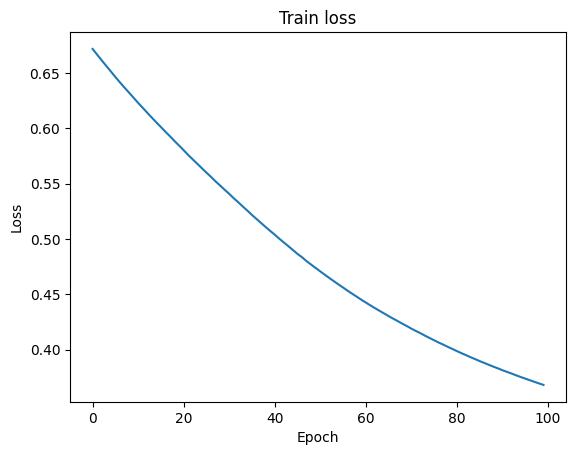

In [22]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [23]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[0.7057413 ],
       [0.25879928],
       [0.20171349],
       [0.83398575],
       [0.9322462 ],
       [0.22475053],
       [0.9059328 ],
       [0.8955245 ],
       [0.6818694 ],
       [0.89327234],
       [0.8851682 ],
       [0.3593016 ],
       [0.22818914],
       [0.87669575],
       [0.9059682 ],
       [0.8430307 ],
       [0.7637242 ],
       [0.355083  ],
       [0.89377964],
       [0.17899711],
       [0.7631729 ],
       [0.58634186],
       [0.33757785],
       [0.44435328],
       [0.17324507],
       [0.14265598],
       [0.89435726],
       [0.45394272],
       [0.8088428 ],
       [0.8877882 ],
       [0.22800751],
       [0.45094112],
       [0.16245613],
       [0.31047237],
       [0.9357556 ],
       [0.4331932 ],
       [0.57526904],
       [0.10105907],
       [0.79430264],
       [0.07476035],
       [0.84122986],
       [0.7623905 ],
       [0.22703068],
       [0.11072465],
       [0.1090133 ],
       [0.9194052 ],
       [0.91473764],
       [0.616

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [24]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = model.evaluate(X_test, y_test)[1]
accuracy

3/3 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8267


0.8266666531562805

**🧪 Test your code**

In [29]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/leomichel/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/leomichel/code/LeonMichel96/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [34]:
from utils.plots import plot_decision_regions

1644/1644 [==============================] - 3s 2ms/step


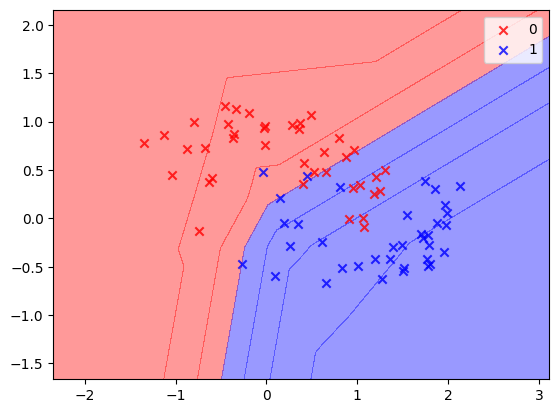

In [38]:
plot_decision_regions(X_test, y_test,model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [39]:
model_2 = initialize_model()

In [40]:
history=model_2.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 4ms/step - loss: 0.8073 - accuracy: 0.2514
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7970 - accuracy: 0.2571
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.2629
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7777 - accuracy: 0.2686
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.2743
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7600 - accuracy: 0.2800
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7514 - accuracy: 0.2914
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7428 - accuracy: 0.2629
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7356 - accuracy: 0.2857
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7271 - accuracy: 0.3086
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.8457
Epoch 85/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.8457
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.8457
Epoch 87/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8457
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.8457
Epoch 89/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8514
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8514
Epoch 91/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8514
Epoch 92/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8514
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.8514
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8514
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8514
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8514
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8514
Epoch 171/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8514
Epoch 172/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8514
Epoch 173/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8514
Epoch 174/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8514
Epoch 175/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8514
Epoch 176/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8514
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8514
Epoch 250/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8514
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8514
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8514
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8514
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.8514
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.8514
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.8514
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8514
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8514
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8514
Epoch 332/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8514
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.8514
Epoch 334/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.8514
Epoch 335/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.8571
Epoch 336/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 337/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 338/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.8571
Epoch 340/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.8571
Epoch 414/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2835 - accuracy: 0.8571
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8571
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8571
Epoch 417/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8571
Epoch 418/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8571
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8571
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8571
Epoch 421/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8571
Epoch 422/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8571
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8571
Epoch 496/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8514
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8514
Epoch 498/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8514
Epoch 499/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8571
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8571


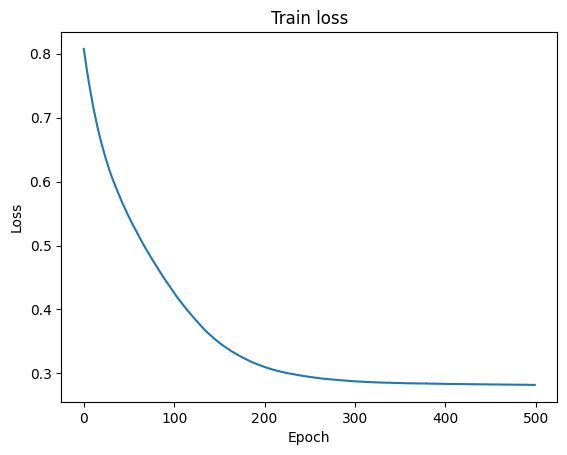

In [41]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [43]:
accuracy_2 = model_2.evaluate(X_test, y_test)[1]
accuracy_2

3/3 [==============================] - 0s 4ms/step - loss: 0.3074 - accuracy: 0.8533


0.8533333539962769

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [48]:
def initialize_model_2():
    model = models.Sequential()
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                60        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [50]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 4ms/step - loss: 0.7176 - accuracy: 0.2171
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.2971
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4400
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4914
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.4914
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.4971
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.4971
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5143
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5257
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.5486
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.9086
Epoch 85/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.9086
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2929 - accuracy: 0.9086
Epoch 87/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.9086
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.9086
Epoch 89/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2853 - accuracy: 0.9086
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.9086
Epoch 91/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2816 - accuracy: 0.9086
Epoch 92/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9086
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9086
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9486
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.9486
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9543
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9486
Epoch 171/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1542 - accuracy: 0.9486
Epoch 172/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1543 - accuracy: 0.9486
Epoch 173/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9486
Epoch 174/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9486
Epoch 175/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9543
Epoch 176/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9543
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9771
Epoch 250/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9771
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9714
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9714
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9714
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9714
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9714
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9714
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9714
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9657
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9714
Epoch 332/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9714
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9657
Epoch 334/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9714
Epoch 335/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9771
Epoch 336/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9771
Epoch 337/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.9771
Epoch 338/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9771
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.9771
Epoch 340/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9771
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9771
Epoch 414/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9771
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9771
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9771
Epoch 417/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9771
Epoch 418/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9771
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 421/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9829
Epoch 422/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9829
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9829
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9829
Epoch 498/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9829
Epoch 499/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9829
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9829


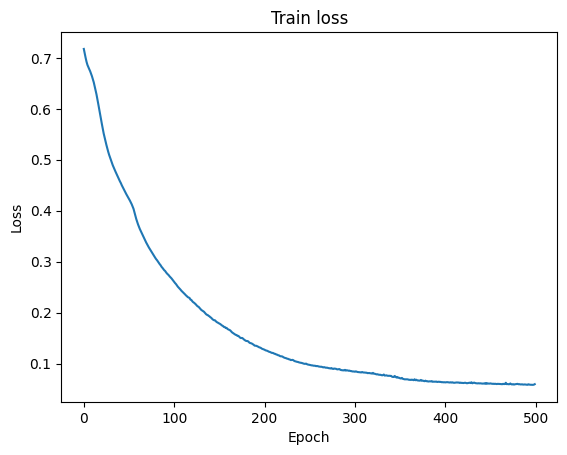

In [51]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [52]:
accuracy_deep = model.evaluate(X_test, y_test)[1]
accuracy_deep

3/3 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9733


0.9733333587646484

🧪 **Test your code**

In [53]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/leomichel/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/leomichel/code/LeonMichel96/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1644/1644 [==============================] - 3s 2ms/step


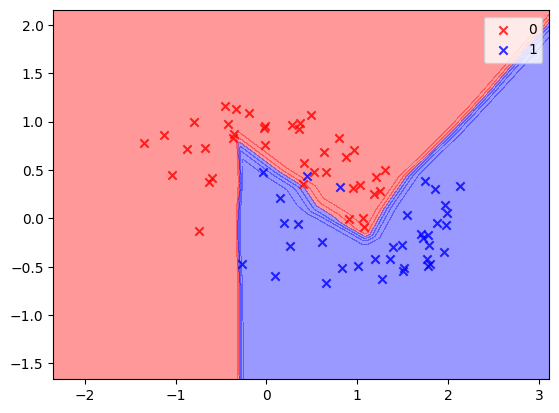

In [54]:
plot_decision_regions(X_test, y_test, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!